In [1]:
#Find the location
import os 
os.getcwd()

'C:\\Users\\sunil\\Downloads'

In [2]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 16,12
RANDOM_SEED = 101
labels = ['Normal','Fraud']

In [3]:
# import the dataset
data = pd.read_csv('CreditCard.csv',sep=',')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data Preprocessing 
# step 1 : check missing data 
# there is no missing data found. 
data.isnull().sum()
# data.isnull().any()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# step 2 : Encoding concept 
# a) Label encoder : char to number
# b) One hot encoder : split data into variables basis binary value
# c) Dummy variables : to avoid multicollinearity problem

# Since there is no char variable, so no need to do encoding part

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# step 3 : Outlier treatment
# since it's classification problem and also most of the variable value fall between 0 and 1
# this is also credit card (anomaly detection problem) so better to ignore outlier part

In [8]:
# step 4 : Feature scaling

In [9]:
# step 5 : check imbalance dataset
data['Class'].value_counts()

# Yes, there is an imbalance dataset. 
# approach : 

0    284315
1       492
Name: Class, dtype: int64

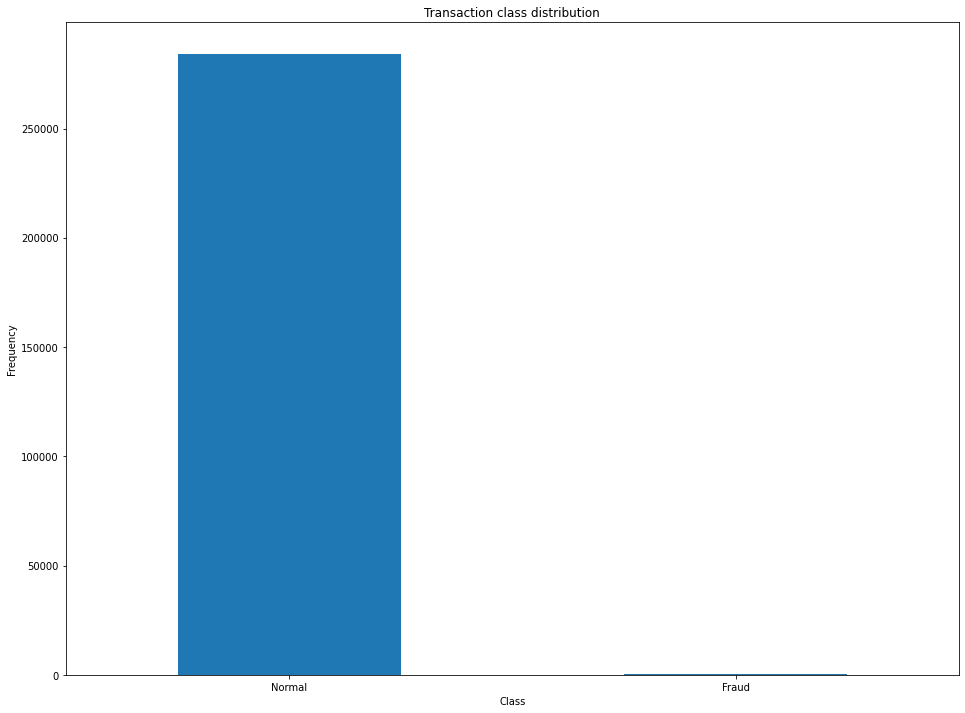

In [10]:
# EDA - Exploratory data analysis
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [11]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]
print(fraud.shape[0])
print(normal.shape[0])

492
284315


In [12]:
normal.Amount.describe() # 5-point summary for normal class

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe() # 5-point summary for fraud class

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

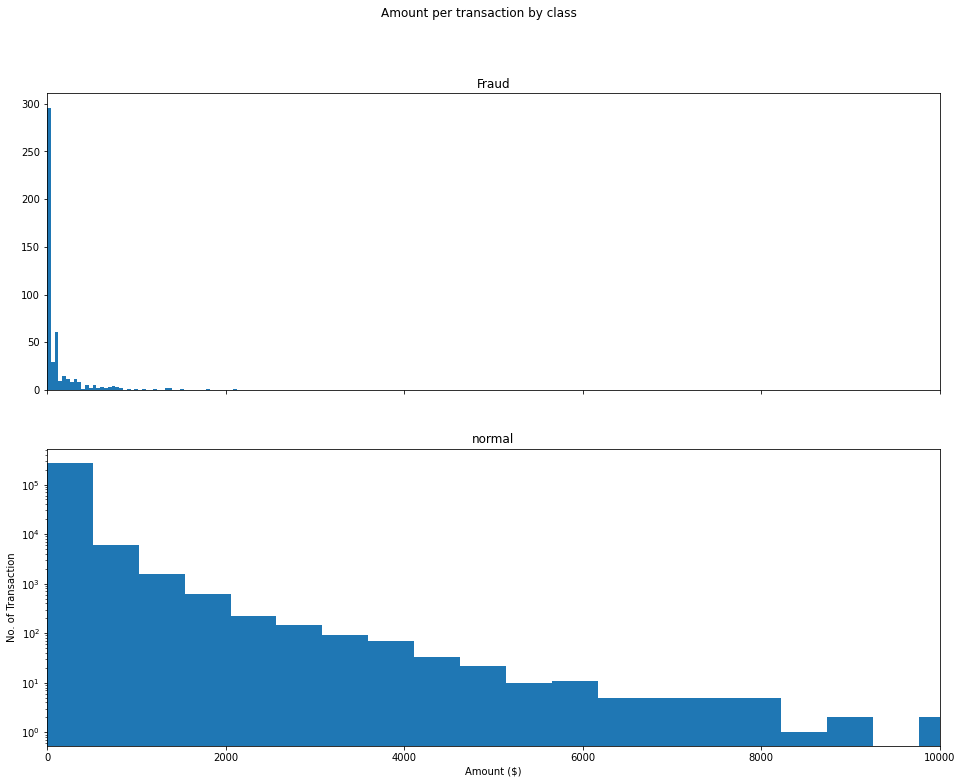

In [14]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,10000)
plt.yscale('log')
plt.show()


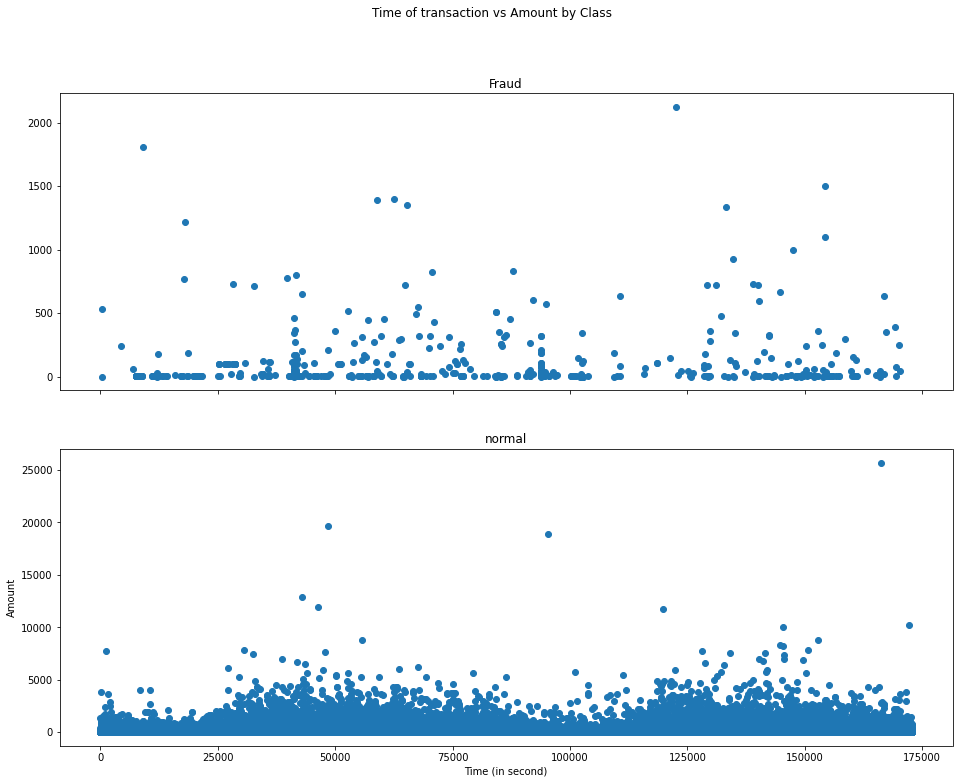

In [15]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (in second)")
plt.ylabel("Amount")

plt.show()


<AxesSubplot:xlabel='Time', ylabel='Density'>

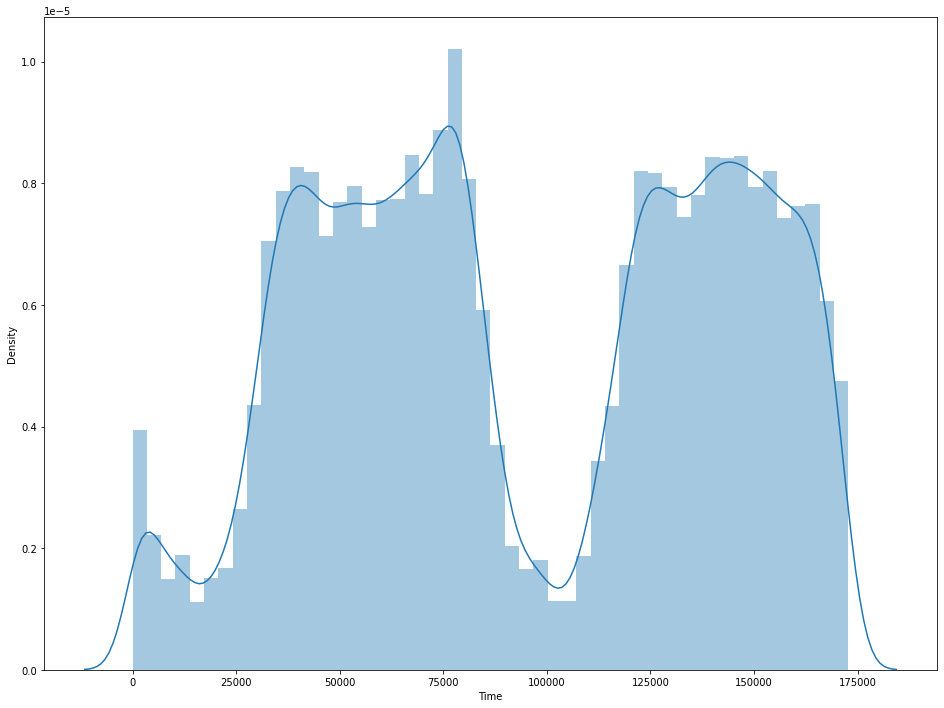

In [16]:
sns.distplot(data['Time'])

In [17]:
len(data)

284807

In [18]:
#outlier_faction = len(fraud)/float(len(valid))
outlier_fraction = 492 / (492+28432)
outlier_fraction

0.017010095422486517

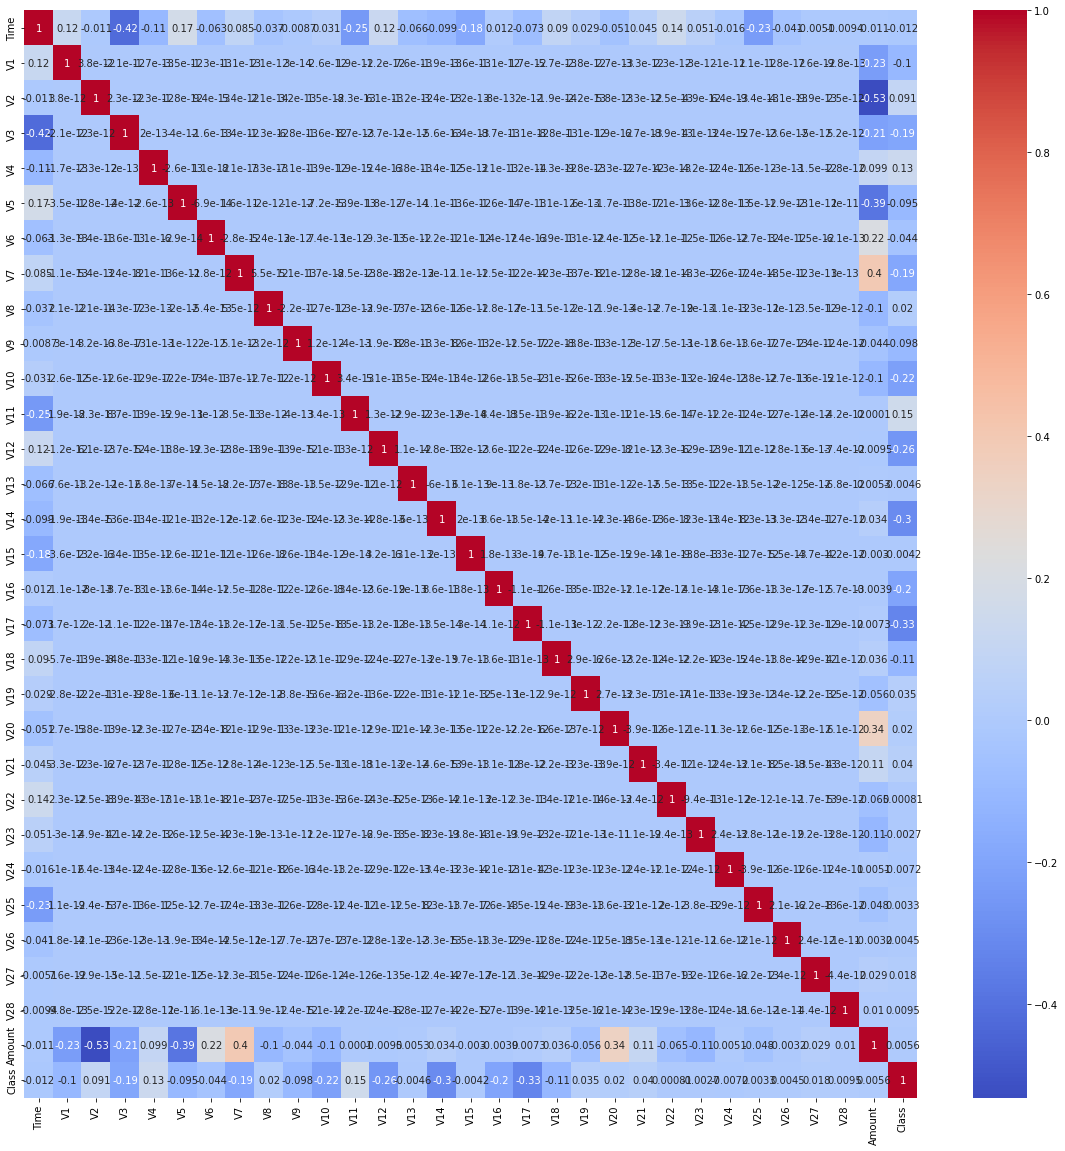

In [19]:
# Correlation part

# Heat Map
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='coolwarm')

In [20]:
columns = data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [21]:
# split the data into target variable and feature variables
columns = [x for x in columns if x not in data['Class']]

target = 'Class'

In [22]:
columns = [c for c in columns if c not in ['Class']]
target = 'Class'

x = data[columns]
y = data[target]
# x_outlier = state.uniform(low=0, high=1, size=(x.shape[0],x.shape[1]))
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [23]:
# split the data into train and test for building the model and prediction

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state=101)

In [25]:
x_train.shape

(199364, 30)

In [26]:
x_test.shape

(85443, 30)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [28]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
print(classification_report(y_train, y_pred_train))

print("====="*11)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.68      0.64      0.66       348

    accuracy                           1.00    199364
   macro avg       0.84      0.82      0.83    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.71      0.67      0.69       144

    accuracy                           1.00     85443
   macro avg       0.86      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [31]:
print(confusion_matrix(y_train, y_pred_train))

print("====="*5)

print(confusion_matrix(y_test, y_pred_test))

[[198913    103]
 [   125    223]]
[[85260    39]
 [   48    96]]


In [32]:
print(accuracy_score(y_train, y_pred_train))

print("===="*5)

print(accuracy_score(y_test, y_pred_test))

0.9988563632350875
0.9989817773252344


### Decision Tree


In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [35]:
print(accuracy_score(y_train, y_pred_dt_train))

print("===="*5)

print(accuracy_score(y_test, y_pred_dt_test))

1.0
0.9992743700478681


In [36]:
from sklearn import tree

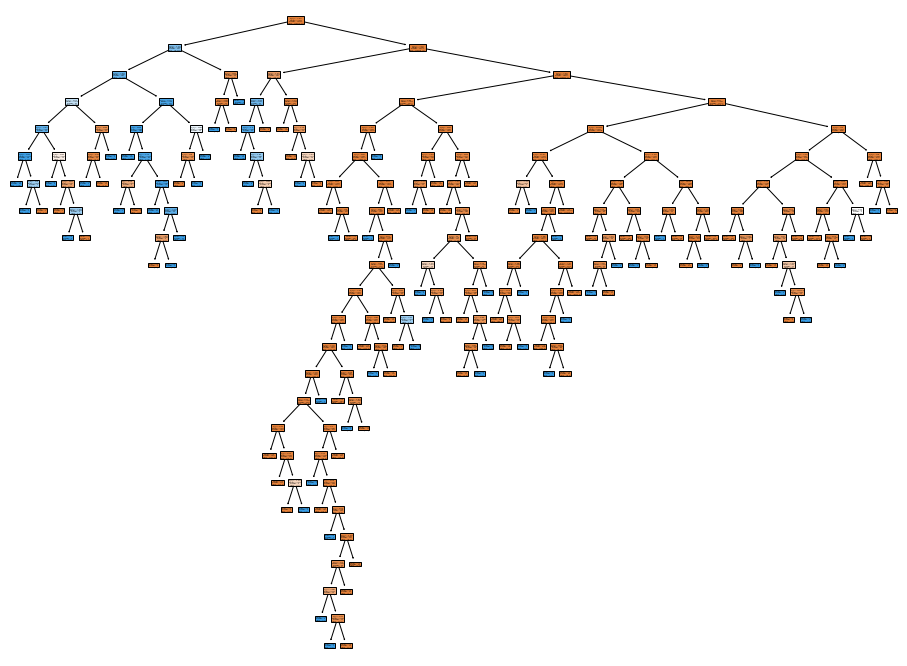

In [37]:
tree.plot_tree(dtree, filled=True)
plt.show()

### Random Forest Tree

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [39]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [40]:
print(accuracy_score(y_train, y_pred_rfc_train))

print("===="*5)

print(accuracy_score(y_test, y_pred_rfc_test))

1.0
0.9995669627705019


In [41]:
print(classification_report(y_train, y_pred_rfc_train))

print("====="*11)

print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      1.00      1.00       348

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.79      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# XGBoost

In [42]:
!pip install xgboost


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
y_pred_xgb_train = xgb_classifier.predict(x_train)
y_pred_xgb_test = xgb_classifier.predict(x_test)

In [45]:
print(accuracy_score(y_train, y_pred_xgb_train))

print("===="*5)

print(accuracy_score(y_test, y_pred_xgb_test))

1.0
0.9995786664794073


In [46]:
print(classification_report(y_train, y_pred_xgb_train))

print("====="*11)

print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      1.00      1.00       348

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.81      0.87       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Isolation Forest

In [56]:
from sklearn.ensemble import IsolationForest


In [60]:
clf=IsolationForest(n_estimators=100, max_samples=len(x), contamination =outlier_fraction)

y_pred =clf.fit_predict(x)
score_prediction=clf.decision_function(x)   

y_pred[y_pred==1]=0
y_pred[y_pred==1]=1
    
error = (y_pred!=y).sum()
    
print('Isolation Forest', error)
    
print('accuracy_score:')
print(accuracy_score(y, y_pred))
    
print("Classification Report :")
print(classification_report(y, y_pred))                                                  

Isolation Forest 4939
accuracy_score:
0.9826584318503407
Classification Report :
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.98      0.99    284315
           1       0.00      0.00      0.00       492

    accuracy                           0.98    284807
   macro avg       0.33      0.33      0.33    284807
weighted avg       1.00      0.98      0.99    284807

